In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lr

diabetes_df = pd.read_csv('diabetes_clean.csv')
print(len(diabetes_df))

768


In [200]:
diabetes_df[diabetes_df["glucose"] > 0]

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [201]:
diabetes_df[diabetes_df['bmi'] > 0]

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [202]:
diabetes_df[['glucose', 'bmi']] = diabetes_df[['glucose', 'bmi']].replace(0, np.nan)
diabetes_df.dropna(subset=['glucose', 'bmi'], inplace=True)
print(len(diabetes_df))

752


In [203]:
#all columns, except glucose
x = diabetes_df.drop("glucose", axis=1).values

#glucose column
y = diabetes_df['glucose'].values
print(type(x), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [204]:
x_bmi = x[:, 4]
print(y.shape, x_bmi.shape)

(752,) (752,)


In [205]:
x_bmi[-1]

np.float64(30.4)

In [206]:
x_bmi = x_bmi.reshape(-1, 1)
print(y.shape, x_bmi.shape)

(752,) (752, 1)


Text(0.5, 0, 'Body Mass Index')

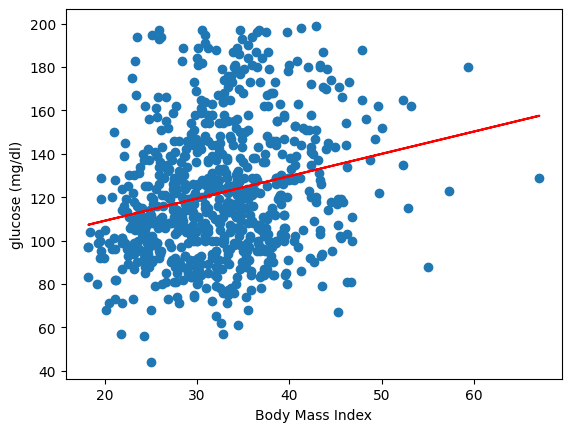

In [ ]:
# instantiate a linear regression module
reg = lr()

#trains the model to predict y using x_bmi
reg.fit(x_bmi, y)

#predictions
pred = reg.predict(x_bmi)

#plots a scatter chart with the predictions as a red line
plt.scatter(x_bmi, y)
plt.plot(x_bmi, pred, color='red')
plt.ylabel('glucose (mg/dl)')
plt.xlabel('Body Mass Index')
